# Project 2 - Data Science Workflow

This is the submission of: Shivam Desai & Wesley Gao

"We worked on this assignment alone.”

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"     # to keep all output without use of print()

## PART 2: GET THE DATA

In [3]:
# Task 2a

telecom = pd.read_csv('Telco-Customer-Churn.csv', sep = ',')

In [4]:
# Task 2b

telecom.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
3,1452-KIOVK,Male,0.0,No,Yes,22.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
4,6713-OKOMC,Female,0.0,No,No,10.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
5,6388-TABGU,Male,0.0,No,Yes,62.0,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
6,9763-GRSKD,Male,0.0,Yes,Yes,13.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7,7469-LKBCI,Male,0.0,No,No,16.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
8,8091-TTVAX,Male,0.0,Yes,No,58.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
9,5129-JLPIS,Male,0.0,No,No,25.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No


In [5]:
# Task 2c

telecom.shape
telecom.info()

(7046, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7046 non-null   object 
 1   gender            7045 non-null   object 
 2   SeniorCitizen     7045 non-null   float64
 3   Partner           7046 non-null   object 
 4   Dependents        7045 non-null   object 
 5   Tenure            7045 non-null   float64
 6   PhoneService      7044 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7039 non-null   object 
 9   OnlineSecurity    7041 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7041 non-null   object 
 12  TechSupport       7037 non-null   object 
 13  StreamingTV       7040 non-null   object 
 14  StreamingMovies   7039 non-null   object 
 15  Contract          7036 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## PART 3: DATA CLEANING 

In [6]:
# Task 3a

telecom.isnull().sum()

customerID           0
gender               1
SeniorCitizen        1
Partner              0
Dependents           1
Tenure               1
PhoneService         2
MultipleLines        3
InternetService      7
OnlineSecurity       5
OnlineBackup         3
DeviceProtection     5
TechSupport          9
StreamingTV          6
StreamingMovies      7
Contract            10
PaperlessBilling     3
PaymentMethod        3
MonthlyCharges       5
TotalCharges         3
Churn               11
dtype: int64

In [7]:
# Task 3b

telecom['Churn'].replace(r'^\s*$', np.nan, regex = True, inplace = True)
telecom['Churn'].isnull().sum()
telecom['Churn'].fillna('No', inplace = True)
telecom['Churn'].isnull().sum()
telecom.shape

11

0

(7046, 21)

In [8]:
# Task 3c

telecom.isnull().any(axis = 1).sum()
telecom.dropna(axis = 'rows', inplace = True)
telecom.isnull().any(axis = 1).sum()
telecom.shape

26

0

(7020, 21)

In [9]:
# Task 3d

telecom.drop_duplicates(inplace = True)
telecom.shape

(7009, 21)

In [11]:
# Task 3e

telecom = telecom.applymap(lambda x : 'NA' if x == 'No internet service' else x)
telecom.head(20)

# telecom['InternetService'].apply(lambda x : 'NA' if x == 'No internet service' else x)

,customerID,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
3,1452-KIOVK,Male,0.0,No,Yes,22.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
4,6713-OKOMC,Female,0.0,No,No,10.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
5,6388-TABGU,Male,0.0,No,Yes,62.0,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
6,9763-GRSKD,Male,0.0,Yes,Yes,13.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7,7469-LKBCI,Male,0.0,No,No,16.0,Yes,No,No,NA,...,NA,NA,NA,NA,Two year,No,Credit card (automatic),18.95,326.8,No
8,8091-TTVAX,Male,0.0,Yes,No,58.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
9,5129-JLPIS,Male,0.0,No,No,25.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No


In [10]:
# Task 3f

telecom = telecom.applymap(lambda x : "Automatic" if x == "Bank transfer (automatic)" or x == "Credit card (automatic)" else x)
telecom.head(10)

# telecom['PaymentMethod'].apply(lambda x : "Automatic" if x == "Bank transfer (automatic)" or x == "Credit card (automatic)" else x)

,customerID,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Automatic,42.30,1840.75,No
3,1452-KIOVK,Male,0.0,No,Yes,22.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Automatic,89.10,1949.4,No
4,6713-OKOMC,Female,0.0,No,No,10.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
5,6388-TABGU,Male,0.0,No,Yes,62.0,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Automatic,56.15,3487.95,No
6,9763-GRSKD,Male,0.0,Yes,Yes,13.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7,7469-LKBCI,Male,0.0,No,No,16.0,Yes,No,No,NA,...,NA,NA,NA,NA,Two year,No,Automatic,18.95,326.8,No
8,8091-TTVAX,Male,0.0,Yes,No,58.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Automatic,100.35,5681.1,No
9,5129-JLPIS,Male,0.0,No,No,25.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No


In [11]:
# Task 3g

telecom.set_index('customerID', inplace = True)
telecom.index.rename("CustomerID", inplace = True)
telecom.head(10)

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Automatic,42.30,1840.75,No
1452-KIOVK,Male,0.0,No,Yes,22.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Automatic,89.10,1949.4,No
6713-OKOMC,Female,0.0,No,No,10.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
6388-TABGU,Male,0.0,No,Yes,62.0,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Automatic,56.15,3487.95,No
9763-GRSKD,Male,0.0,Yes,Yes,13.0,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0.0,No,No,16.0,Yes,No,No,NA,NA,NA,NA,NA,NA,Two year,No,Automatic,18.95,326.8,No
8091-TTVAX,Male,0.0,Yes,No,58.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Automatic,100.35,5681.1,No


<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

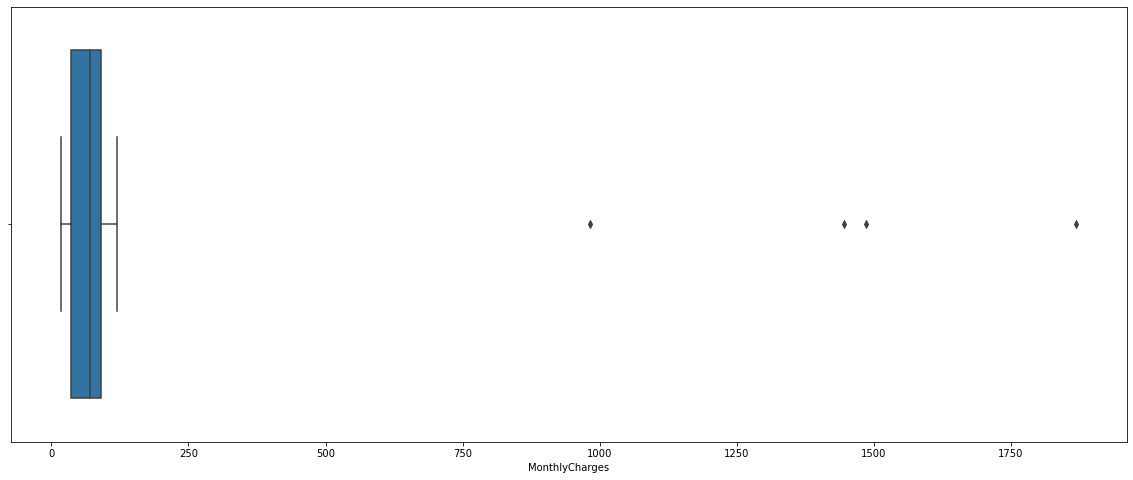

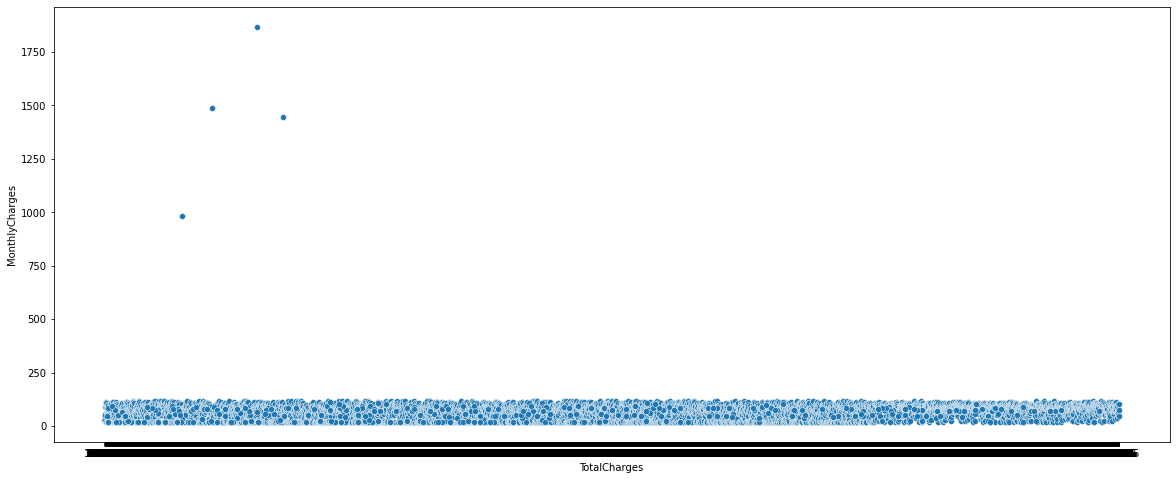

In [12]:
# Task 3h

plt.figure(figsize = (20, 8))
viz1 = sns.boxplot(x = telecom['MonthlyCharges'])

plt.figure(figsize = (20, 8))
viz2 = sns.scatterplot(data = telecom, x = telecom['TotalCharges'], y = telecom['MonthlyCharges'])

# viz2 (above) takes a couple minutes to run and load the graph
# viz2 = telecom['MonthlyCharges'].hist()

<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='MonthlyCharges'>

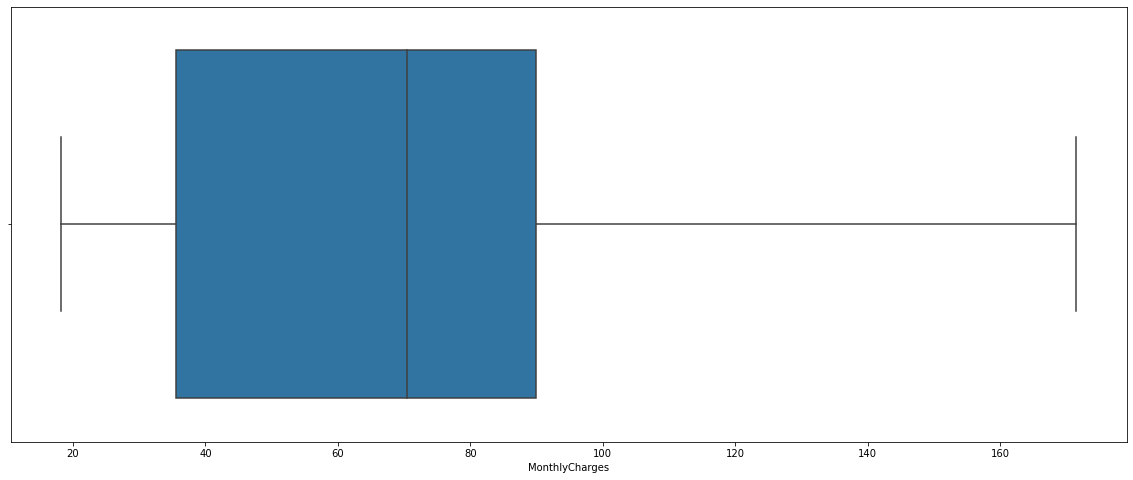

In [13]:
# Task 3i

Q1 = telecom['MonthlyCharges'].quantile(0.25)
Q3 = telecom['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5

# MonthlyCharges_outliers = telecom[(telecom['MonthlyCharges'] < Q1 - whisker_width*IQR) | (telecom['MonthlyCharges'] > Q3 + whisker_width*IQR)]
# MonthlyCharges_outliers.head() # can uncomment these before removing outliers to see outlier values

upper_whisker = Q3 + (whisker_width * IQR) # threshold value
telecom['MonthlyCharges'] = np.where(telecom['MonthlyCharges'] > upper_whisker, upper_whisker, telecom['MonthlyCharges'])
plt.figure(figsize = (20, 8))
sns.boxplot(x = telecom['MonthlyCharges'])

In [14]:
# Task 3j

telecom['TotalCharges'] = pd.to_numeric(telecom.TotalCharges, errors = 'coerce')
telecom.shape

delete_row = []
for index, row in telecom.iterrows():
    cross_check = row['Tenure'] * row['MonthlyCharges']
    if cross_check != row['TotalCharges']:
        totalcharge = row['TotalCharges']
        upper10 = totalcharge + (totalcharge * 0.1)
        lower10 = totalcharge - (totalcharge * 0.1)
        if cross_check < lower10 or cross_check > upper10:
            delete_row.append(index)

telecom = telecom.drop(labels = delete_row, axis = 0)
telecom.shape

(7009, 20)

(6609, 20)

## PART 4: DATA EXPLORATION 

<Figure size 1440x576 with 0 Axes>

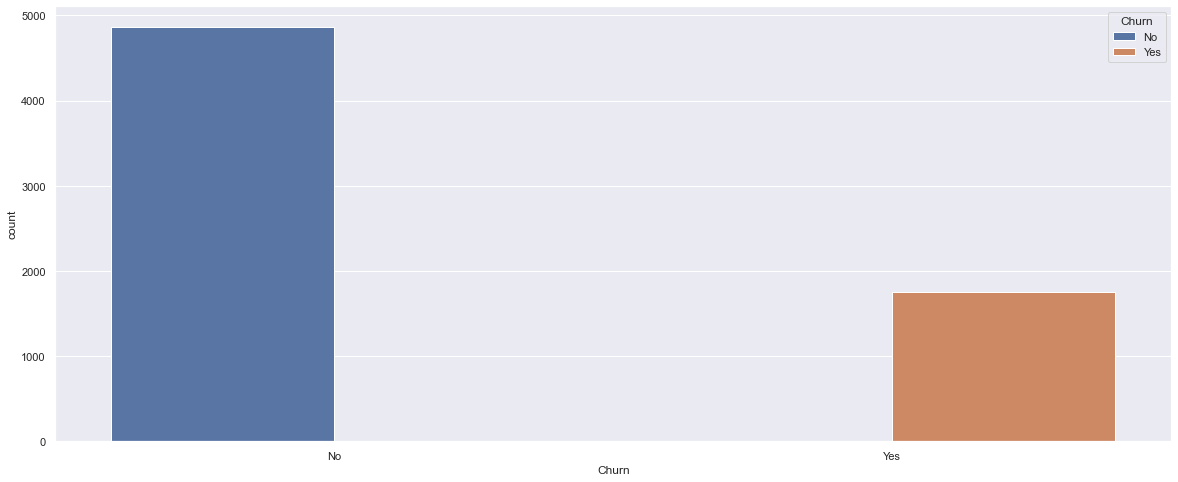

In [15]:
# Task 4a

sns.set_theme(style = "darkgrid")
plt.figure(figsize = (20, 8))
cntp = sns.countplot(x = telecom['Churn'], hue = telecom['Churn'], data = telecom)

<Figure size 1440x576 with 0 Axes>

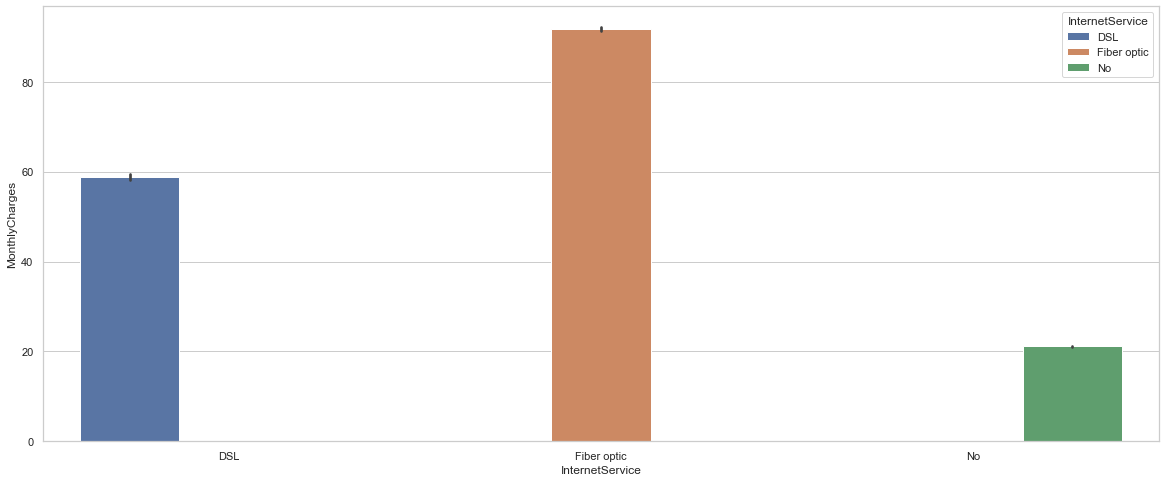

In [16]:
# Task 4b

sns.set_theme(style = "whitegrid")
plt.figure(figsize = (20, 8))
barp = sns.barplot(x = telecom['InternetService'], y = telecom['MonthlyCharges'], hue = telecom['InternetService'], data = telecom)

<Figure size 1440x576 with 0 Axes>

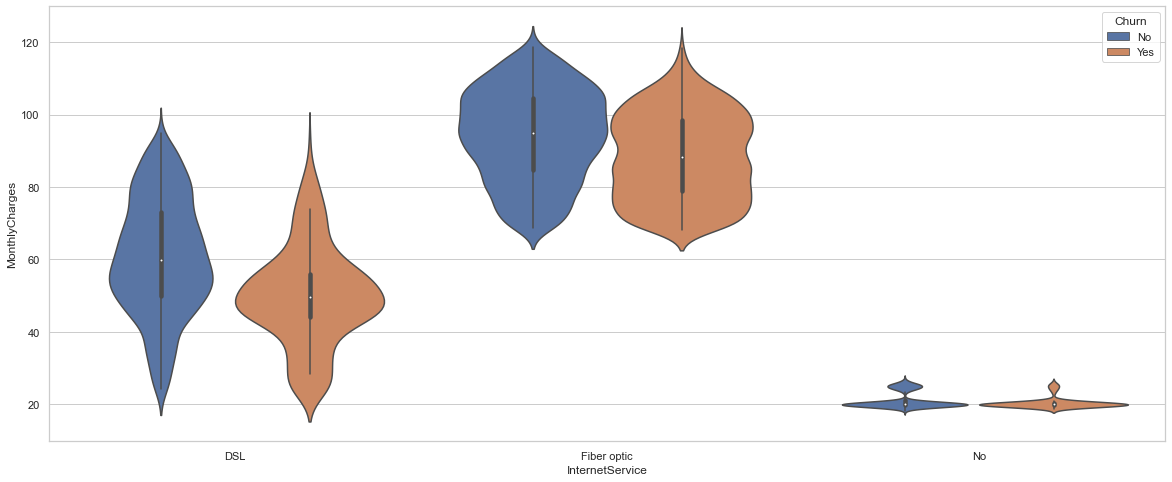

In [17]:
# Task 4c

plt.figure(figsize = (20, 8))
viop = sns.violinplot(x = telecom['InternetService'], y = telecom['MonthlyCharges'], hue = telecom['Churn'], data = telecom)

<Figure size 1440x576 with 0 Axes>

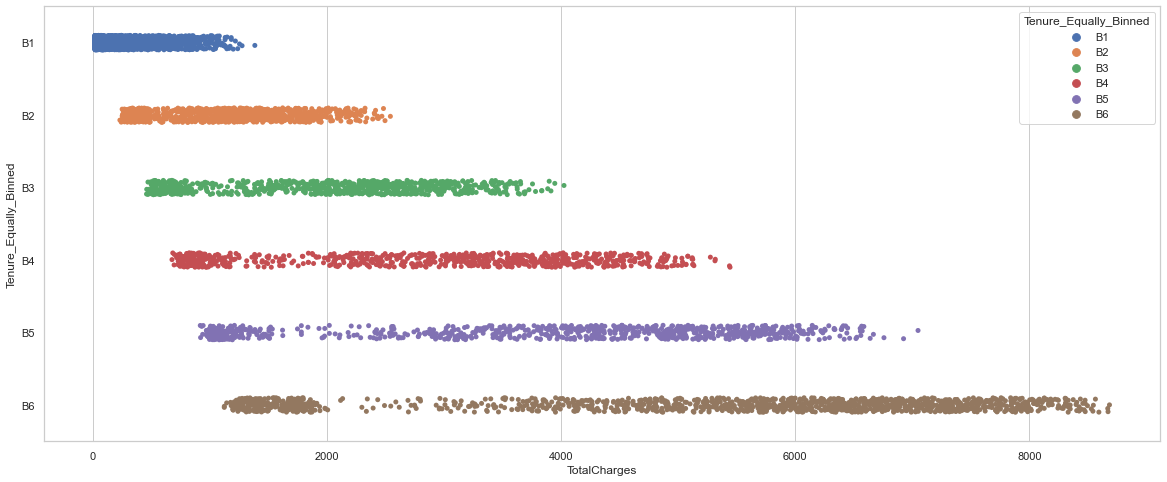

In [18]:
# Task 4d

telecom['Tenure_Equally_Binned'] = pd.cut(telecom['Tenure'], bins = 6, right = True, labels = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6'])
plt.figure(figsize = (20, 8))
strp = sns.stripplot(x = telecom['TotalCharges'], y = telecom['Tenure_Equally_Binned'], hue = telecom['Tenure_Equally_Binned'], data = telecom)

<Figure size 1440x576 with 0 Axes>

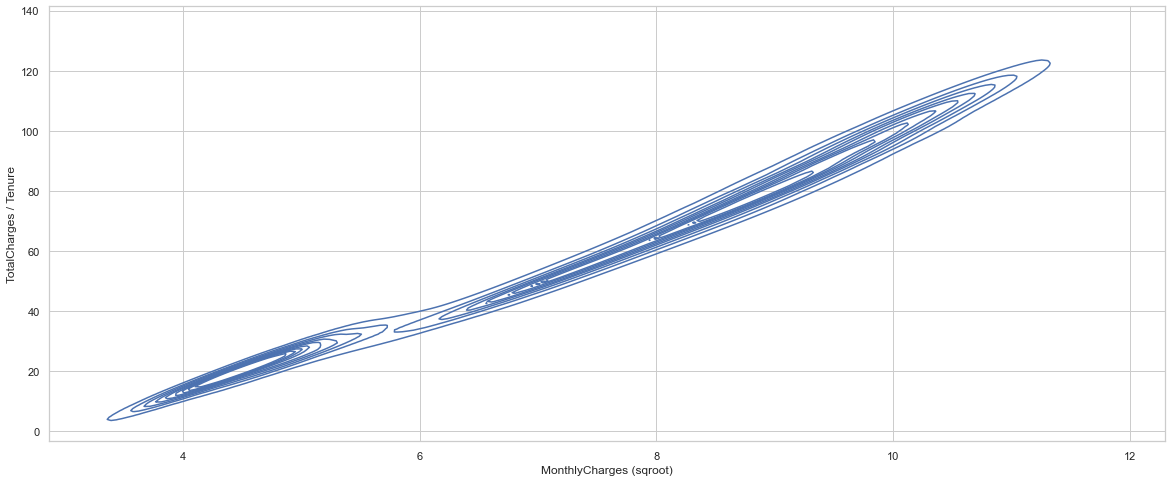

In [19]:
# Task 4e

# telecom = telecom[~telecom.index.duplicated()]

sqroot = lambda x : x ** (1/2)
telecom['MonthlyCharges (sqroot)'] = telecom['MonthlyCharges'].apply(sqroot)
telecom['TotalCharges / Tenure'] = (telecom['TotalCharges'] / telecom['Tenure'])
plt.figure(figsize = (20, 8))
kdep = sns.kdeplot(data = telecom, x = (telecom['MonthlyCharges (sqroot)']), y = (telecom['TotalCharges / Tenure']), legend = True)

<Figure size 1440x576 with 0 Axes>

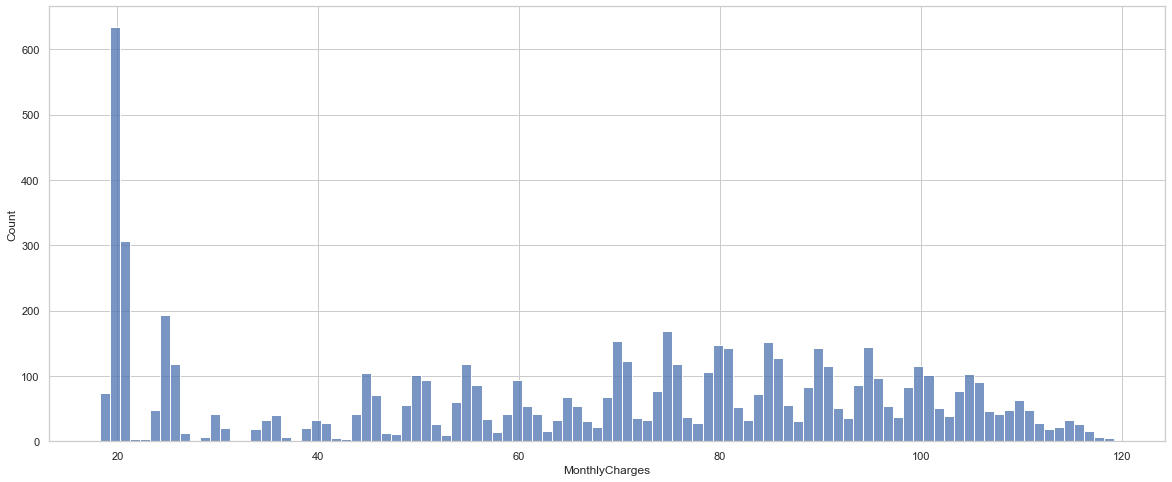

In [20]:
# Task 4f

plt.figure(figsize = (20, 8))
hstp = sns.histplot(telecom['MonthlyCharges'], bins = 50, binwidth = 1)

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

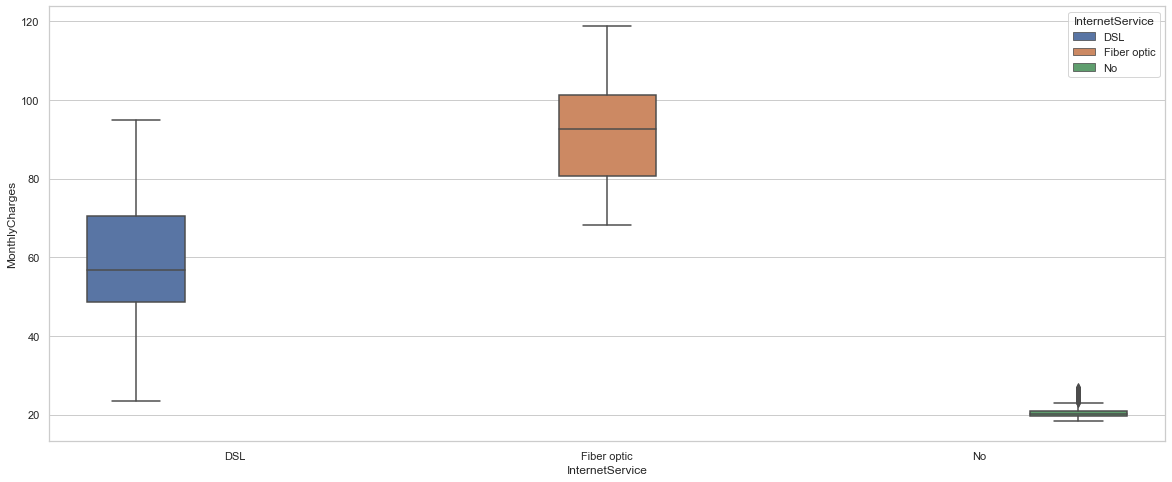

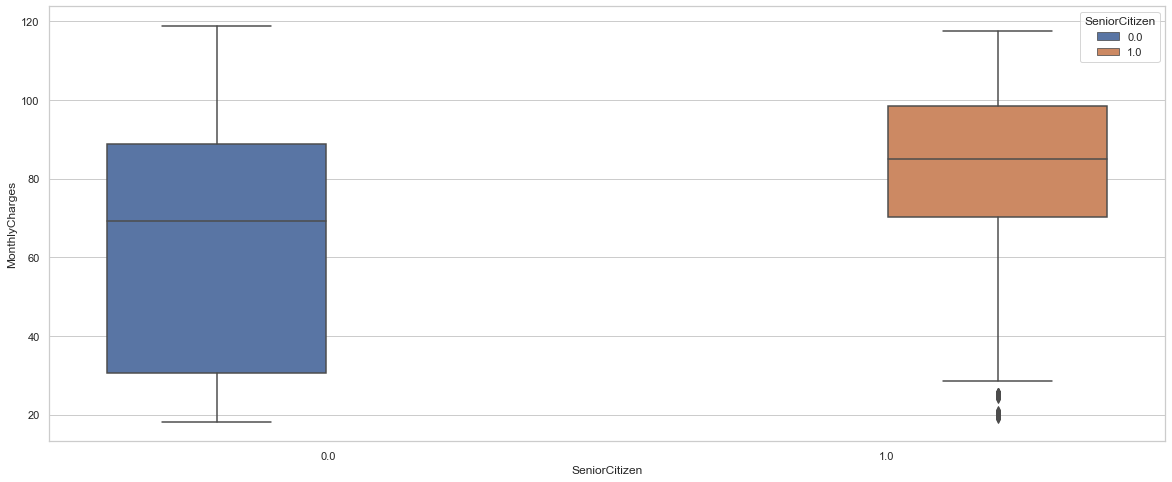

In [21]:
# Task #4g

plt.figure(figsize = (20, 8))
boxp1 = sns.boxplot(y = telecom['MonthlyCharges'], x = telecom['InternetService'], hue = telecom['InternetService'], data = telecom)

plt.figure(figsize = (20, 8))
boxp2 = sns.boxplot(y = telecom['MonthlyCharges'], x = telecom['SeniorCitizen'], hue = telecom['SeniorCitizen'], data = telecom)

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

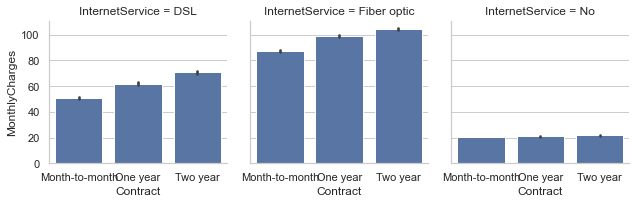

In [22]:
# Task 4h

plt.figure(figsize = (20, 8))
facetg = sns.FacetGrid(telecom, col = 'InternetService')
facetg.map(sns.barplot, 'Contract', 'MonthlyCharges', order = ['Month-to-month', 'One year', 'Two year'])

# https://seaborn.pydata.org/tutorial/axis_grids.html

## PART 5: DATA TRANSFORMATION 

<Figure size 1440x576 with 0 Axes>

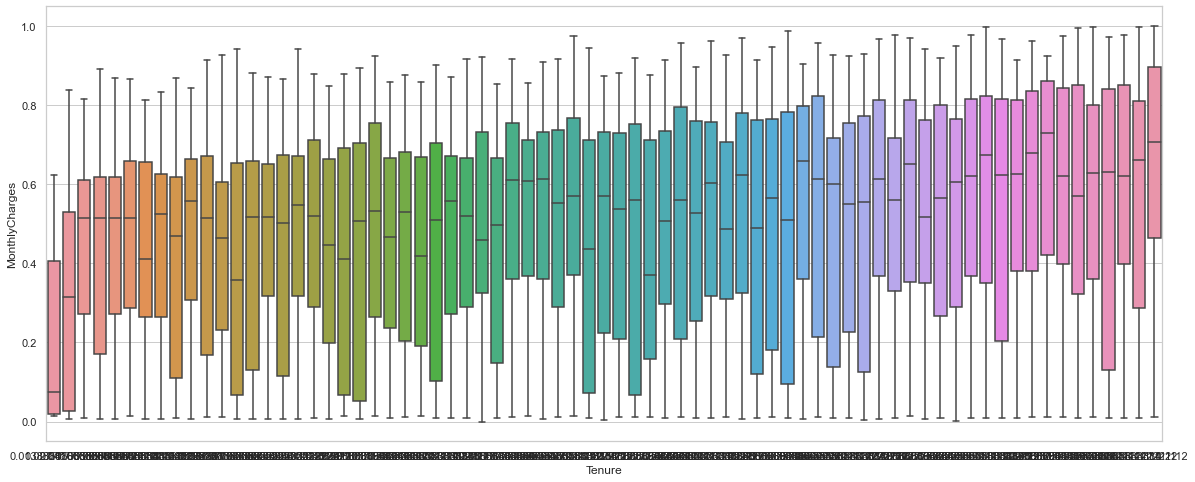

In [23]:
# Task 5a

# telecom['Tenure']
# telecom['MonthlyCharges']

# copy the dataframe
# telecom_norm = telecom.copy()

# normalized_df = (df - df.min()) / (df.max() - df.min())
telecom['Tenure'] = ((telecom['Tenure'] - telecom['Tenure'].min()) / (telecom['Tenure'].max() - telecom['Tenure'].min()))
telecom['MonthlyCharges'] = ((telecom['MonthlyCharges'] - telecom['MonthlyCharges'].min()) / (telecom['MonthlyCharges'].max() - telecom['MonthlyCharges'].min()))
plt.figure(figsize = (20, 8))
boxp3 = sns.boxplot(x = telecom['Tenure'], y = telecom['MonthlyCharges'], data = telecom)

,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Equally_Binned,MonthlyCharges (sqroot),TotalCharges / Tenure,TenureCat
CustomerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0.0,Yes,No,0.013889,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,0.115423,29.85,No,B1,5.463515,29.850000,1
5575-GNVDE,Male,0.0,No,No,0.472222,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,0.385075,1889.50,No,B3,7.546522,55.573529,2
7795-CFOCW,Male,0.0,No,No,0.625000,No,No phone service,DSL,Yes,No,...,One year,No,Automatic,0.239303,1840.75,No,B4,6.503845,40.905556,3
1452-KIOVK,Male,0.0,No,Yes,0.305556,Yes,Yes,Fiber optic,No,Yes,...,Month-to-month,Yes,Automatic,0.704975,1949.40,No,B2,9.439280,88.609091,2
6713-OKOMC,Female,0.0,No,No,0.138889,No,No phone service,DSL,Yes,No,...,Month-to-month,No,Mailed check,0.114428,301.90,No,B1,5.454356,30.190000,1
6388-TABGU,Male,0.0,No,Yes,0.861111,Yes,No,DSL,Yes,Yes,...,One year,No,Automatic,0.377114,3487.95,No,B6,7.493330,56.257258,4
7469-LKBCI,Male,0.0,No,No,0.222222,Yes,No,No,NA,NA,...,Two year,No,Automatic,0.006965,326.80,No,B2,4.353160,20.425000,1
8091-TTVAX,Male,0.0,Yes,No,0.805556,Yes,Yes,Fiber optic,No,No,...,One year,No,Automatic,0.816915,5681.10,No,B5,10.017485,97.950000,4
5129-JLPIS,Male,0.0,No,No,0.347222,Yes,No,Fiber optic,Yes,No,...,Month-to-month,Yes,Electronic check,0.868159,2686.05,No,B3,10.271319,107.442000,2


<Figure size 1440x576 with 0 Axes>

<AxesSubplot:xlabel='TenureCat', ylabel='Count'>

,gender,SeniorCitizen,Partner,Dependents,TenureCat,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,29.85,No
5575-GNVDE,Male,0.0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,1889.50,No
7795-CFOCW,Male,0.0,No,No,3,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Automatic,0.239303,1840.75,No
1452-KIOVK,Male,0.0,No,Yes,2,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Automatic,0.704975,1949.40,No
6713-OKOMC,Female,0.0,No,No,1,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,0.114428,301.90,No
6388-TABGU,Male,0.0,No,Yes,4,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Automatic,0.377114,3487.95,No
7469-LKBCI,Male,0.0,No,No,1,Yes,No,No,NA,NA,NA,NA,NA,NA,Two year,No,Automatic,0.006965,326.80,No
8091-TTVAX,Male,0.0,Yes,No,4,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Automatic,0.816915,5681.10,No
5129-JLPIS,Male,0.0,No,No,2,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0.868159,2686.05,No


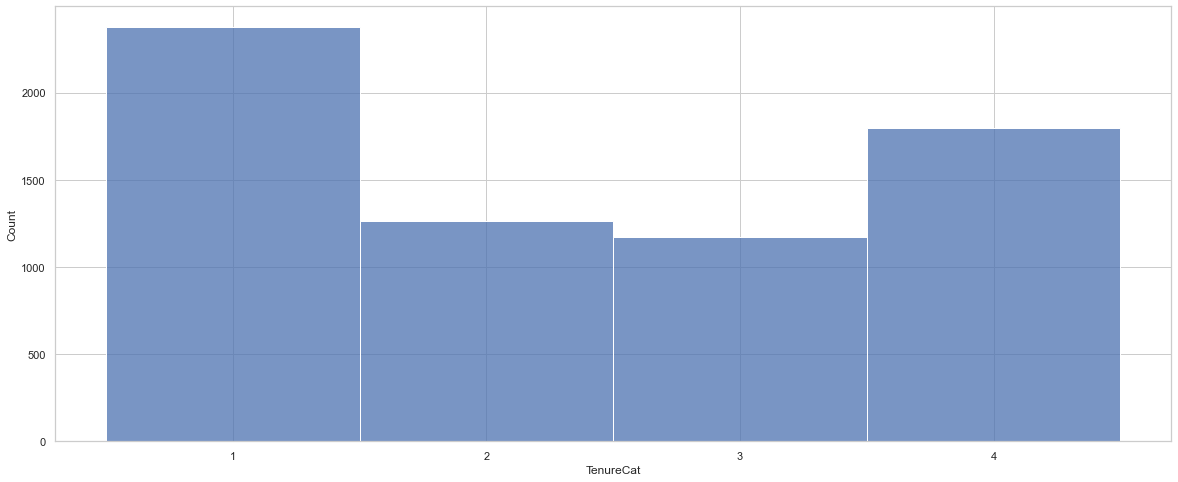

In [24]:
# Task 5b

telecom['TenureCat'] = pd.cut(telecom['Tenure'], bins = 4, labels = ['1', '2', '3', '4'])

telecom.head(10)
plt.figure(figsize = (20, 8))
sns.histplot(telecom['TenureCat'])
telecom.drop(columns = ['Tenure'], inplace = True)

columnsTitles = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'TenureCat', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
telecom = telecom.reindex(columns = columnsTitles)
telecom.head(10)

In [25]:
# Task 5c

Group = telecom.groupby([telecom['TenureCat'], telecom['Contract']])
Group[['Contract']].count()

df1 = Group[['Contract']].count()
df2 = df1

def style_negative(v, props = ''):
    return props if v < 0 else None
s2 = df1.style.applymap(style_negative, props = 'color:red;')

def highlight_max(s, props = ''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props = 'color:white; background-color:darkblue; font-weight:bold', axis = 0)

def style_negative(v, props = ''):
    return props if v < 0 else None
s2 = df2.style.applymap(style_negative, props = 'color:red;')

def highlight_min(s, props = ''):
    return np.where(s == np.nanmin(s.values), props, '')
s2.apply(highlight_min, props = 'color:white; background-color:darkblue; font-weight:bold', axis = 0)

Contract
TenureCat Contract                
1         Month-to-month      2128
          One year             166
          Two year              82
2         Month-to-month       787
          One year             343
          Two year             134
3         Month-to-month       437
          One year             433
          Two year             300
4         Month-to-month       217
          One year             455
          Two year            1127

In [26]:
# Task 5d

telecom.groupby(telecom['InternetService'])['MonthlyCharges'].mean()
telecom.groupby(telecom['TenureCat'])['MonthlyCharges'].mean()

InternetService
DSL            0.402878
Fiber optic    0.730969
No             0.028737
Name: MonthlyCharges, dtype: float64

TenureCat
1    0.407132
2    0.465902
3    0.493301
4    0.564873
Name: MonthlyCharges, dtype: float64

In [27]:
# Task 5e

Group1 = telecom.groupby(['TenureCat','Contract'])
Mean1 = Group1['MonthlyCharges'].mean()
Mean1

TenureCat  Contract      
1          Month-to-month    0.430353
           One year          0.236291
           Two year          0.150364
2          Month-to-month    0.548419
           One year          0.376098
           Two year          0.211146
3          Month-to-month    0.609912
           One year          0.506981
           Two year          0.303693
4          Month-to-month    0.692065
           One year          0.635779
           Two year          0.511756
Name: MonthlyCharges, dtype: float64

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='TenureCat,Contract'>

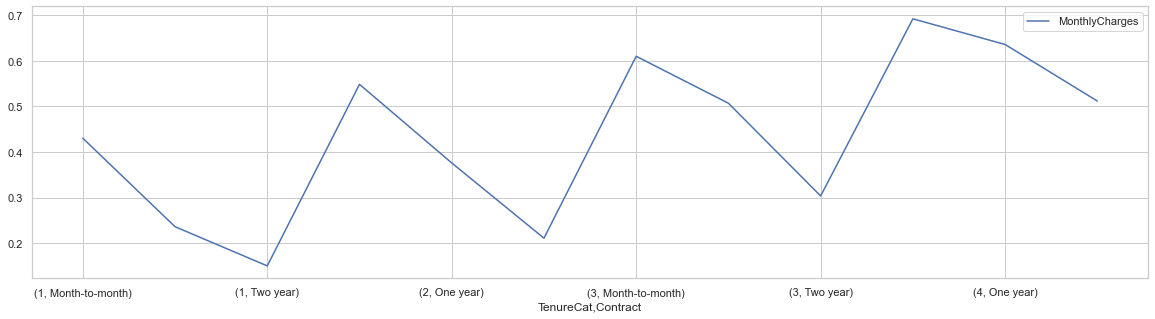

In [28]:
# Task 5f

plt.figure(figsize = (20, 5))
Mean1.plot()
plt.legend()

## PART 8: FEATURE ENGINEERING

In [29]:
# Task 8a

def techsavvy(row):
    if (row['InternetService'] == 'Fiber optic') and (row['OnlineSecurity'] == 'Yes') and (row['OnlineBackup'] == 'Yes'):
        return 'High'
    if (row['InternetService'] == 'Fiber optic') and (row['OnlineSecurity'] == 'Yes') and (row['OnlineBackup'] == 'No'):
        return 'Medium'
    if (row['InternetService'] == 'No'):
        return 'Unknown'
    else:
        return 'Low'

telecom['Techsavvy'] = telecom.apply(lambda row: techsavvy(row), axis = 1)
telecom.head(10)
telecom.drop(columns = ['OnlineSecurity', 'OnlineBackup'], inplace = True)
telecom.head(10)

telecom['Techsavvy'].dtype
telecom['Techsavvy'] = telecom['Techsavvy'].astype('category')
telecom['Techsavvy'].dtype

,gender,SeniorCitizen,Partner,Dependents,TenureCat,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Techsavvy
CustomerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,0.115423,29.85,No,Low
5575-GNVDE,Male,0.0,No,No,2,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,0.385075,1889.50,No,Low
7795-CFOCW,Male,0.0,No,No,3,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Automatic,0.239303,1840.75,No,Low
1452-KIOVK,Male,0.0,No,Yes,2,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Automatic,0.704975,1949.40,No,Low
6713-OKOMC,Female,0.0,No,No,1,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,No,Mailed check,0.114428,301.90,No,Low
6388-TABGU,Male,0.0,No,Yes,4,Yes,No,DSL,Yes,Yes,...,No,No,No,One year,No,Automatic,0.377114,3487.95,No,Low
7469-LKBCI,Male,0.0,No,No,1,Yes,No,No,NA,NA,...,NA,NA,NA,Two year,No,Automatic,0.006965,326.80,No,Unknown
8091-TTVAX,Male,0.0,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,One year,No,Automatic,0.816915,5681.10,No,Low
5129-JLPIS,Male,0.0,No,No,2,Yes,No,Fiber optic,Yes,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0.868159,2686.05,No,Medium


,gender,SeniorCitizen,Partner,Dependents,TenureCat,PhoneService,MultipleLines,InternetService,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Techsavvy
CustomerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0.0,Yes,No,1,No,No phone service,DSL,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,29.85,No,Low
5575-GNVDE,Male,0.0,No,No,2,Yes,No,DSL,Yes,No,No,No,One year,No,Mailed check,0.385075,1889.50,No,Low
7795-CFOCW,Male,0.0,No,No,3,No,No phone service,DSL,Yes,Yes,No,No,One year,No,Automatic,0.239303,1840.75,No,Low
1452-KIOVK,Male,0.0,No,Yes,2,Yes,Yes,Fiber optic,No,No,Yes,No,Month-to-month,Yes,Automatic,0.704975,1949.40,No,Low
6713-OKOMC,Female,0.0,No,No,1,No,No phone service,DSL,No,No,No,No,Month-to-month,No,Mailed check,0.114428,301.90,No,Low
6388-TABGU,Male,0.0,No,Yes,4,Yes,No,DSL,No,No,No,No,One year,No,Automatic,0.377114,3487.95,No,Low
7469-LKBCI,Male,0.0,No,No,1,Yes,No,No,NA,NA,NA,NA,Two year,No,Automatic,0.006965,326.80,No,Unknown
8091-TTVAX,Male,0.0,Yes,No,4,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,One year,No,Automatic,0.816915,5681.10,No,Low
5129-JLPIS,Male,0.0,No,No,2,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0.868159,2686.05,No,Medium


dtype('O')

CategoricalDtype(categories=['High', 'Low', 'Medium', 'Unknown'], ordered=False)

In [30]:
# Task 8b

def streamer(row):
    if (row['StreamingTV'] == 'Yes') and (row['StreamingMovies'] == 'Yes'):
        return 'Streamer'
    if (row['InternetService'] == 'No'):
        return 'Unknown'
    else:
        return 'Non-Streamer'

telecom['Streamer'] = telecom.apply(lambda row: streamer(row), axis = 1)
telecom.head(10)
telecom.drop(columns = ['InternetService', 'StreamingTV', 'StreamingMovies'], inplace = True)
telecom.head(10)

telecom['Streamer'].dtype
telecom['Streamer'] = telecom['Streamer'].astype('category')
telecom['Streamer'].dtype

telecom.groupby(telecom['Streamer'])['Streamer'].count()

,gender,SeniorCitizen,Partner,Dependents,TenureCat,PhoneService,MultipleLines,InternetService,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Techsavvy,Streamer
CustomerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0.0,Yes,No,1,No,No phone service,DSL,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,29.85,No,Low,Non-Streamer
5575-GNVDE,Male,0.0,No,No,2,Yes,No,DSL,Yes,No,No,No,One year,No,Mailed check,0.385075,1889.50,No,Low,Non-Streamer
7795-CFOCW,Male,0.0,No,No,3,No,No phone service,DSL,Yes,Yes,No,No,One year,No,Automatic,0.239303,1840.75,No,Low,Non-Streamer
1452-KIOVK,Male,0.0,No,Yes,2,Yes,Yes,Fiber optic,No,No,Yes,No,Month-to-month,Yes,Automatic,0.704975,1949.40,No,Low,Non-Streamer
6713-OKOMC,Female,0.0,No,No,1,No,No phone service,DSL,No,No,No,No,Month-to-month,No,Mailed check,0.114428,301.90,No,Low,Non-Streamer
6388-TABGU,Male,0.0,No,Yes,4,Yes,No,DSL,No,No,No,No,One year,No,Automatic,0.377114,3487.95,No,Low,Non-Streamer
7469-LKBCI,Male,0.0,No,No,1,Yes,No,No,NA,NA,NA,NA,Two year,No,Automatic,0.006965,326.80,No,Unknown,Unknown
8091-TTVAX,Male,0.0,Yes,No,4,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,One year,No,Automatic,0.816915,5681.10,No,Low,Streamer
5129-JLPIS,Male,0.0,No,No,2,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0.868159,2686.05,No,Medium,Streamer


,gender,SeniorCitizen,Partner,Dependents,TenureCat,PhoneService,MultipleLines,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Techsavvy,Streamer
CustomerID,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0.0,Yes,No,1,No,No phone service,No,No,Month-to-month,Yes,Electronic check,0.115423,29.85,No,Low,Non-Streamer
5575-GNVDE,Male,0.0,No,No,2,Yes,No,Yes,No,One year,No,Mailed check,0.385075,1889.50,No,Low,Non-Streamer
7795-CFOCW,Male,0.0,No,No,3,No,No phone service,Yes,Yes,One year,No,Automatic,0.239303,1840.75,No,Low,Non-Streamer
1452-KIOVK,Male,0.0,No,Yes,2,Yes,Yes,No,No,Month-to-month,Yes,Automatic,0.704975,1949.40,No,Low,Non-Streamer
6713-OKOMC,Female,0.0,No,No,1,No,No phone service,No,No,Month-to-month,No,Mailed check,0.114428,301.90,No,Low,Non-Streamer
6388-TABGU,Male,0.0,No,Yes,4,Yes,No,No,No,One year,No,Automatic,0.377114,3487.95,No,Low,Non-Streamer
7469-LKBCI,Male,0.0,No,No,1,Yes,No,NA,NA,Two year,No,Automatic,0.006965,326.80,No,Unknown,Unknown
8091-TTVAX,Male,0.0,Yes,No,4,Yes,Yes,Yes,No,One year,No,Automatic,0.816915,5681.10,No,Low,Streamer
5129-JLPIS,Male,0.0,No,No,2,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.868159,2686.05,No,Medium,Streamer


dtype('O')

CategoricalDtype(categories=['Non-Streamer', 'Streamer', 'Unknown'], ordered=False)

Streamer
Non-Streamer    3381
Streamer        1898
Unknown         1330
Name: Streamer, dtype: int64

CategoricalDtype(categories=['High', 'Low', 'Medium', 'Unknown'], ordered=False)

CategoricalDtype(categories=['High', 'Low', 'Medium'], ordered=False)

<Figure size 432x288 with 0 Axes>

CategoricalDtype(categories=['Non-Streamer', 'Streamer', 'Unknown'], ordered=False)

CategoricalDtype(categories=['Non-Streamer', 'Streamer'], ordered=False)

<Figure size 432x288 with 0 Axes>

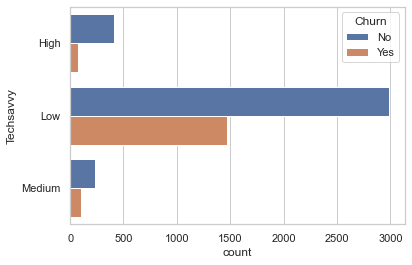

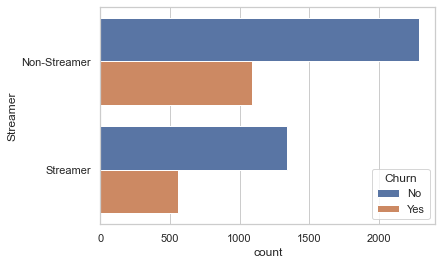

In [31]:
# Task 8c
pd.options.mode.chained_assignment = None  # default='warn'

telecom['Techsavvy'].dtype
df = telecom[-(telecom.Techsavvy == 'Unknown')]
df.Techsavvy = df.Techsavvy.cat.remove_categories('Unknown')
df.Techsavvy.dtype

plt.figure()
viz1 = sns.countplot(data=df, y='Techsavvy',hue='Churn')

telecom['Streamer'].dtype
df = telecom[-(telecom.Streamer == 'Unknown')]
df.Streamer = df.Streamer.cat.remove_categories('Unknown')
df.Streamer.dtype

plt.figure()
viz2 = sns.countplot(data=df, y='Streamer',hue='Churn')

In [32]:
#Task 8d

telecom_dummies1 = pd.get_dummies(telecom, columns = ['Streamer', 'Techsavvy', 'TenureCat'])
telecom_dummies1.head()

telecom['PaymentMethod'].dtype
telecom['PaymentMethod'] = telecom['PaymentMethod'].astype('category')
telecom['PaymentMethod'].dtype

telecom['SeniorCitizen'].dtype
telecom['SeniorCitizen'] = telecom['SeniorCitizen'].astype('category')
telecom['SeniorCitizen'].dtype

telecom_dummies2 = pd.get_dummies(telecom, columns = ['PaymentMethod', 'SeniorCitizen'])
telecom_dummies2.head()

telecom = pd.concat([telecom, telecom_dummies1, telecom_dummies2], axis = 1)
telecom.head()
telecom.drop(columns = ['Streamer', 'Techsavvy', 'TenureCat', 'PaymentMethod', 'SeniorCitizen'], inplace = True)
telecom.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,DeviceProtection,TechSupport,Contract,PaperlessBilling,...,Streamer_Streamer,Streamer_Unknown,Techsavvy_High,Techsavvy_Low,Techsavvy_Medium,Techsavvy_Unknown,TenureCat_1,TenureCat_2,TenureCat_3,TenureCat_4
CustomerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0.0,Yes,No,No,No phone service,No,No,Month-to-month,Yes,...,0,0,0,1,0,0,1,0,0,0
5575-GNVDE,Male,0.0,No,No,Yes,No,Yes,No,One year,No,...,0,0,0,1,0,0,0,1,0,0
7795-CFOCW,Male,0.0,No,No,No,No phone service,Yes,Yes,One year,No,...,0,0,0,1,0,0,0,0,1,0
1452-KIOVK,Male,0.0,No,Yes,Yes,Yes,No,No,Month-to-month,Yes,...,0,0,0,1,0,0,0,1,0,0
6713-OKOMC,Female,0.0,No,No,No,No phone service,No,No,Month-to-month,No,...,0,0,0,1,0,0,1,0,0,0


dtype('O')

CategoricalDtype(categories=['Automatic', 'Electronic check', 'Mailed check'], ordered=False)

dtype('float64')

CategoricalDtype(categories=[0.0, 1.0], ordered=False)

,gender,Partner,Dependents,TenureCat,PhoneService,MultipleLines,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Techsavvy,Streamer,PaymentMethod_Automatic,PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0.0,SeniorCitizen_1.0
CustomerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,Yes,No,1,No,No phone service,No,No,Month-to-month,Yes,0.115423,29.85,No,Low,Non-Streamer,0,1,0,1,0
5575-GNVDE,Male,No,No,2,Yes,No,Yes,No,One year,No,0.385075,1889.50,No,Low,Non-Streamer,0,0,1,1,0
7795-CFOCW,Male,No,No,3,No,No phone service,Yes,Yes,One year,No,0.239303,1840.75,No,Low,Non-Streamer,1,0,0,1,0
1452-KIOVK,Male,No,Yes,2,Yes,Yes,No,No,Month-to-month,Yes,0.704975,1949.40,No,Low,Non-Streamer,1,0,0,1,0
6713-OKOMC,Female,No,No,1,No,No phone service,No,No,Month-to-month,No,0.114428,301.90,No,Low,Non-Streamer,0,0,1,1,0


,gender,SeniorCitizen,Partner,Dependents,TenureCat,PhoneService,MultipleLines,DeviceProtection,TechSupport,Contract,...,MonthlyCharges,TotalCharges,Churn,Techsavvy,Streamer,PaymentMethod_Automatic,PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0.0,SeniorCitizen_1.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0.0,Yes,No,1,No,No phone service,No,No,Month-to-month,...,0.115423,29.85,No,Low,Non-Streamer,0,1,0,1,0
5575-GNVDE,Male,0.0,No,No,2,Yes,No,Yes,No,One year,...,0.385075,1889.50,No,Low,Non-Streamer,0,0,1,1,0
7795-CFOCW,Male,0.0,No,No,3,No,No phone service,Yes,Yes,One year,...,0.239303,1840.75,No,Low,Non-Streamer,1,0,0,1,0
1452-KIOVK,Male,0.0,No,Yes,2,Yes,Yes,No,No,Month-to-month,...,0.704975,1949.40,No,Low,Non-Streamer,1,0,0,1,0
6713-OKOMC,Female,0.0,No,No,1,No,No phone service,No,No,Month-to-month,...,0.114428,301.90,No,Low,Non-Streamer,0,0,1,1,0


,gender,Partner,Dependents,PhoneService,MultipleLines,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,...,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Automatic,PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0.0,SeniorCitizen_1.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,Yes,No,No,No phone service,No,No,Month-to-month,Yes,0.115423,...,Month-to-month,Yes,0.115423,29.85,No,0,1,0,1,0
5575-GNVDE,Male,No,No,Yes,No,Yes,No,One year,No,0.385075,...,One year,No,0.385075,1889.50,No,0,0,1,1,0
7795-CFOCW,Male,No,No,No,No phone service,Yes,Yes,One year,No,0.239303,...,One year,No,0.239303,1840.75,No,1,0,0,1,0
1452-KIOVK,Male,No,Yes,Yes,Yes,No,No,Month-to-month,Yes,0.704975,...,Month-to-month,Yes,0.704975,1949.40,No,1,0,0,1,0
6713-OKOMC,Female,No,No,No,No phone service,No,No,Month-to-month,No,0.114428,...,Month-to-month,No,0.114428,301.90,No,0,0,1,1,0


In [33]:
telecom.to_csv('telecom.csv')

In [34]:
# Task 8d

# https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
telecom = telecom.loc[:,~telecom.columns.duplicated()]
# telecom = telecom.T.drop_duplicates().T
telecom.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,...,Techsavvy_Unknown,TenureCat_1,TenureCat_2,TenureCat_3,TenureCat_4,PaymentMethod_Automatic,PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0.0,SeniorCitizen_1.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,Yes,No,No,No phone service,No,No,Month-to-month,Yes,0.115423,...,0,1,0,0,0,0,1,0,1,0
5575-GNVDE,Male,No,No,Yes,No,Yes,No,One year,No,0.385075,...,0,0,1,0,0,0,0,1,1,0
7795-CFOCW,Male,No,No,No,No phone service,Yes,Yes,One year,No,0.239303,...,0,0,0,1,0,1,0,0,1,0
1452-KIOVK,Male,No,Yes,Yes,Yes,No,No,Month-to-month,Yes,0.704975,...,0,0,1,0,0,1,0,0,1,0
6713-OKOMC,Female,No,No,No,No phone service,No,No,Month-to-month,No,0.114428,...,0,1,0,0,0,0,0,1,1,0


In [35]:
telecom.to_csv('telecom1.csv')

## PART 9: FEATURE SELECT & FEATURE IMPORTANCE

In [36]:
# Task 9

telecom.head()
telecom.drop(columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'DeviceProtection',
                        'TechSupport', 'Contract', 'PaperlessBilling', 'TotalCharges'], inplace = True)
telecom.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,...,Techsavvy_Unknown,TenureCat_1,TenureCat_2,TenureCat_3,TenureCat_4,PaymentMethod_Automatic,PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0.0,SeniorCitizen_1.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,Yes,No,No,No phone service,No,No,Month-to-month,Yes,0.115423,...,0,1,0,0,0,0,1,0,1,0
5575-GNVDE,Male,No,No,Yes,No,Yes,No,One year,No,0.385075,...,0,0,1,0,0,0,0,1,1,0
7795-CFOCW,Male,No,No,No,No phone service,Yes,Yes,One year,No,0.239303,...,0,0,0,1,0,1,0,0,1,0
1452-KIOVK,Male,No,Yes,Yes,Yes,No,No,Month-to-month,Yes,0.704975,...,0,0,1,0,0,1,0,0,1,0
6713-OKOMC,Female,No,No,No,No phone service,No,No,Month-to-month,No,0.114428,...,0,1,0,0,0,0,0,1,1,0


,MonthlyCharges,Churn,Streamer_Non-Streamer,Streamer_Streamer,Streamer_Unknown,Techsavvy_High,Techsavvy_Low,Techsavvy_Medium,Techsavvy_Unknown,TenureCat_1,TenureCat_2,TenureCat_3,TenureCat_4,PaymentMethod_Automatic,PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0.0,SeniorCitizen_1.0
CustomerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,0.115423,No,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
5575-GNVDE,0.385075,No,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0
7795-CFOCW,0.239303,No,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1452-KIOVK,0.704975,No,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
6713-OKOMC,0.114428,No,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0


## PART 10: MODELING

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = telecom[['MonthlyCharges','Streamer_Non-Streamer','Streamer_Streamer','Streamer_Unknown',
             'Techsavvy_High','Techsavvy_Low','Techsavvy_Medium','Techsavvy_Unknown',
             'TenureCat_1','TenureCat_2','TenureCat_3','TenureCat_4',
             'PaymentMethod_Automatic','PaymentMethod_Electronic check','PaymentMethod_Mailed check',
             'SeniorCitizen_0.0','SeniorCitizen_1.0']]

y = telecom['Churn'] # Churn Status is our dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42) 
X_train, X_test, y_train, y_test

logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train) # This is where the training is taking place
y_pred_logreg = logreg.predict(X_test) # Making predictions to test the model on test data

print('Logistic Regression Train Accuracy %s' % logreg.score(X_train, y_train)) # Train accuracy
print()
print('Logistic Regression Test Accuracy %s' % accuracy_score(y_pred_logreg, y_test)) # Test accuracy
print()

print(confusion_matrix(y_test, y_pred_logreg)) # Confusion matrix
print(classification_report(y_test, y_pred_logreg)) # Classification Report

(            MonthlyCharges  Streamer_Non-Streamer  Streamer_Streamer  \
 CustomerID                                                             
 8417-GSODA        0.735821                      0                  1   
 2688-BHGOG        0.609950                      1                  0   
 3552-CTCYF        0.861194                      0                  1   
 2195-ZRVAX        0.667164                      1                  0   
 4578-PHJYZ        0.502488                      1                  0   
 ...                    ...                    ...                ...   
 4012-YCFAI        0.428856                      1                  0   
 2845-HSJCY        0.686567                      1                  0   
 9809-IMGCQ        0.780597                      0                  1   
 2153-MREFK        0.805473                      1                  0   
 9531-NSBMR        0.009950                      0                  0   
 
             Streamer_Unknown  Techsavvy_High  Te

LogisticRegression(max_iter=1000)

Logistic Regression Train Accuracy 0.780327868852459

Logistic Regression Test Accuracy 0.7874432677760969

[[1780  166]
 [ 396  302]]
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1946
         Yes       0.65      0.43      0.52       698

    accuracy                           0.79      2644
   macro avg       0.73      0.67      0.69      2644
weighted avg       0.77      0.79      0.77      2644

